In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import time
import numpy as np
import query_db
import composite
import spectral_analysis as sa
import composite
import datafidelity as df
import copy

In [3]:
query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1 and ((dm15_cfa >= .9 and dm15_cfa < 1.2) or (dm15_from_fits >= .9 and dm15_from_fits < 1.2))"]

In [4]:
composites, sn_arrays, boot_sn_arrays = query_db.main(1, query, boot='nb', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1 and ((dm15_cfa >= .9 and dm15_cfa < 1.2) or (dm15_from_fits >= .9 and dm15_from_fits < 1.2))


OperationalError: no such column: dm15_cfa

In [ ]:
query_db.set_min_num_spec(composites, 5)
comp = composites[0]
sm_comp = copy.copy(comp)
var_y = np.zeros(len(comp.wavelength[comp.x1:comp.x2]))
sm_comp.flux = df.gsmooth(comp.wavelength[comp.x1:comp.x2], comp.flux[comp.x1:comp.x2], var_y, vexp = .002)
plt.figure (figsize=(30,10)) 
plt.axis('off')
plt.plot(sm_comp.wavelength[sm_comp.x1:sm_comp.x2], sm_comp.flux, linewidth = 8, color = '#3F5D7D')
plt.xlim([3470.,8500.])
plt.savefig('../../FLASH/title_composite.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [5]:
query ="SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where NED_host between 1 and 18"
SN_Array = composite.grab(query, multi_epoch = False, make_corr = False)

ERROR:  2003hv_20040901_51567_151964_00.dat None
ERROR:  1998bu_19990126_0_2_00.dat None
154 questionable files currently ignored
419 spectra found
Arrays cleaned


In [15]:
host = []
dm15 = []
err = []
# for SN in SN_Array:
#     if (SN.ned_host >= 2 and SN.ned_host <= 7):
#         SN.ned_host = 7
#     if SN.ned_host < 2:
#         SN.ned_host = 6
#     if SN.ned_host >= 16:
#         SN.ned_host = 16
for SN in SN_Array:
    if SN.dm15_source != None:
        dm15.append(SN.dm15_source)
        err.append(SN.e_dm15)
        host.append(SN.ned_host)
    elif SN.dm15_from_fits != None:
        dm15.append(SN.dm15_from_fits)
        host.append(SN.ned_host)
        err.append(SN.e_dm15)

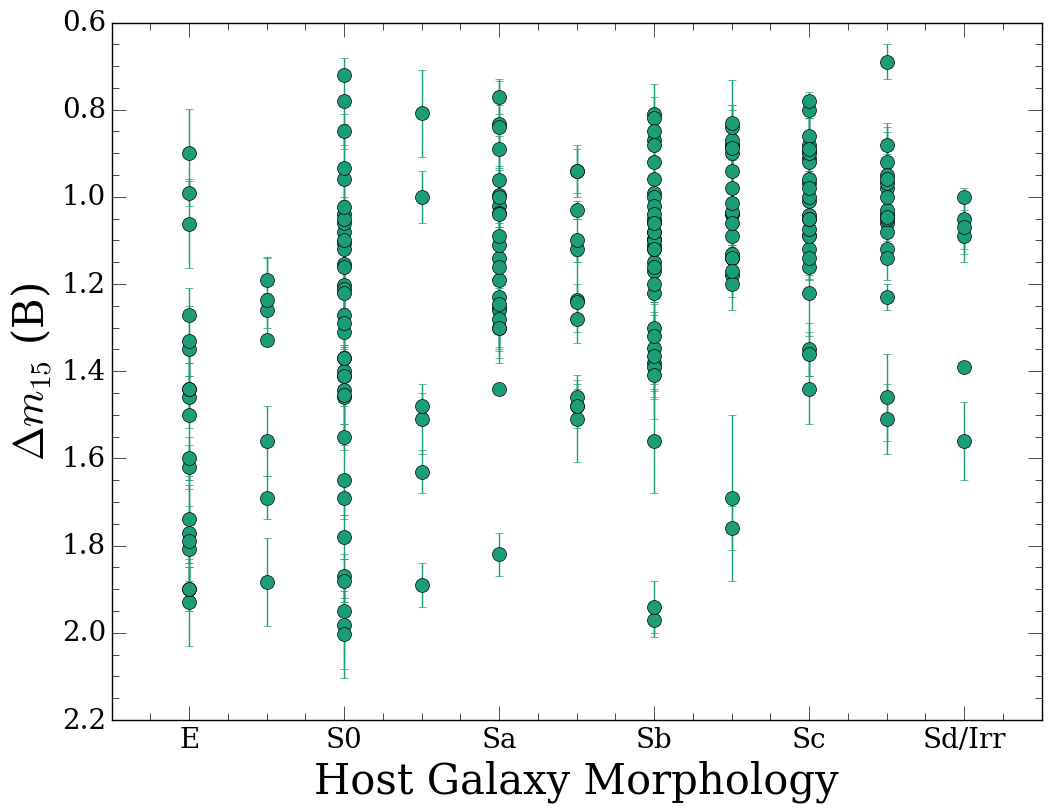

In [23]:
plt.figure(figsize=(12, 9)) 
plt.rc('font', family='serif')
ax = plt.subplot(111)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=5)
plt.gca().invert_yaxis()
plt.errorbar(host, dm15, yerr=err, fmt='o', color='#1b9e77', ms=10)
plt.xlim(5,17)
x = [6,8,10,12,14,16]
labels = ['E','S0','Sa','Sb','Sc', 'Sd/Irr']
plt.xticks(x, labels, fontsize = 20)
plt.ylabel("$\Delta m_{15}$ (B)", fontsize=30)  
plt.xlabel("Host Galaxy Morphology", fontsize=30)  
plt.savefig('../../FLASH/host_dependence.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [25]:
query ="SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN where v_at_max"
SN_Array_color = composite.grab(query, multi_epoch = False, make_corr = False)

ERROR:  2003hv_20040901_51567_151964_00.dat None
ERROR:  sn2007jg-20070918-not.dat None
ERROR:  2002bo_20020314_0_2_00.dat None
ERROR:  2002bo_20020403_0_2_00.dat None
ERROR:  2002bo_20020421_0_2_00.dat None
ERROR:  2002bo_20020518_0_2_00.dat None
ERROR:  2002bo_20020615_9394_16509_00.dat None
ERROR:  sn1992a-19920116.220-iue.flm None
ERROR:  sn2006oa-20061116-not.dat None
ERROR:  sn2006oa-20061122-not.dat None
ERROR:  1998bu_19990126_0_2_00.dat None
154 questionable files currently ignored
281 spectra found
Arrays cleaned


In [27]:
dm15_color = []
err_color = []
color = []
mag = []
vel = []
v_err = []
for SN in SN_Array_color:
    if SN.dm15_source != None:
        dm15_color.append(SN.dm15_source)
        err_color.append(SN.e_dm15)
        color.append(SN.B_minus_V)
        mag.append(SN.m_b)
        vel.append(SN.v_at_max)
        v_err.append(SN.e_v)
    elif SN.dm15_from_fits != None:
        dm15_color.append(SN.dm15_from_fits)
        err_color.append(SN.e_dm15)
        color.append(SN.B_minus_V)
        mag.append(SN.m_b)
        vel.append(SN.v_at_max)
        v_err.append(SN.e_v)

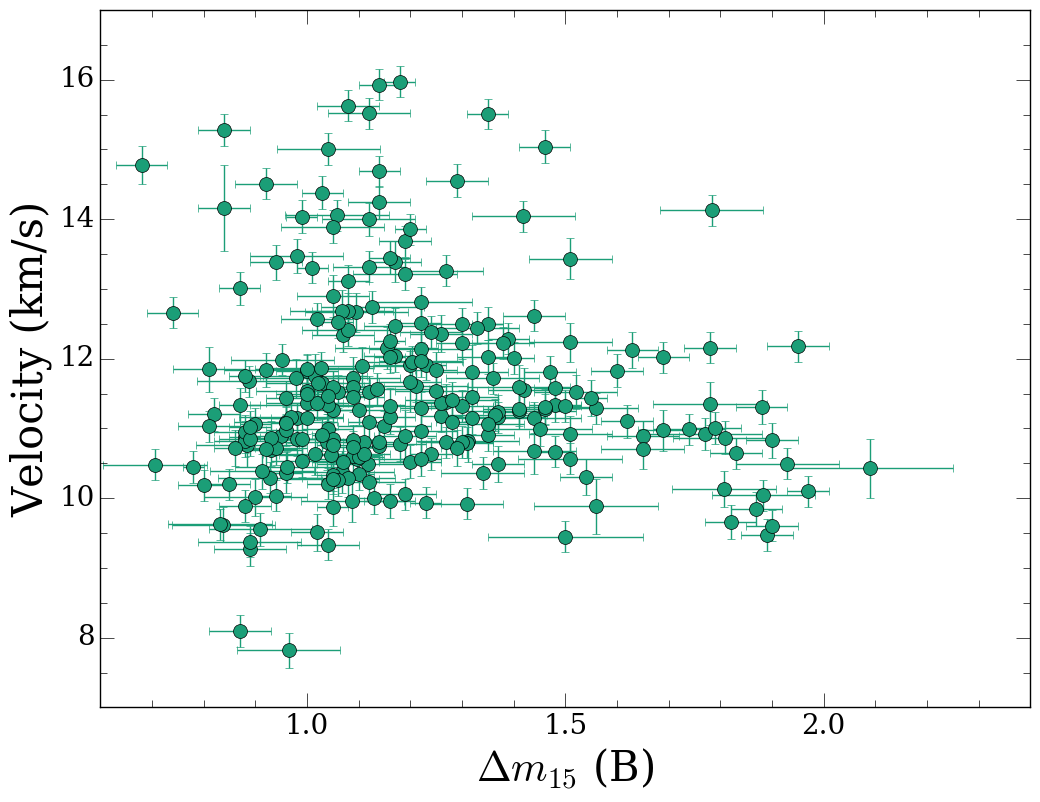

In [36]:
plt.figure(figsize=(12, 9)) 
plt.rc('font', family='serif')
ax = plt.subplot(111)
plt.minorticks_on()
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.tick_params(
    which='major', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=10)
plt.tick_params(
    which='minor', 
    bottom='on', 
    top='on',
    left='on',
    right='on',
    length=5)
# plt.gca().invert_yaxis()
plt.errorbar(dm15_color, -1.*np.asarray(vel), xerr = err_color, yerr=v_err, fmt='o', color='#1b9e77', ms=10)
plt.xlabel("$\Delta m_{15}$ (B)", fontsize=30)
plt.ylabel('Velocity (km/s)', fontsize = 30)
plt.savefig('../../FLASH/velocity_dependence.pdf', dpi = 300, bbox_inches = 'tight')
plt.show()

In [99]:
query = ["SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase between -3 and 3 and Supernovae.SN = '1999aa' and source != 'uv'",
         "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1 and ((dm15_source >= 1.1 and dm15_source < 1.2) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.2)) and Supernovae.SN = '2007co'",
        "SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1 and (dm15_source >= 1.7 or dm15_from_fits >= 1.7) and Supernovae.SN = '1991bg'"]

In [100]:
composites_div, sn_arrays_div, boot_sn_arrays_div = query_db.main(len(query), query, boot='nb', medmean=1)

SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase between -3 and 3 and Supernovae.SN = '1999aa' and source != 'uv'
154 questionable files currently ignored
1 spectra found
154 questionable files currently ignored
0 questionable spectra removed 1 spectra left
0 Peculiar Ias removed 1 spectra left
1 SNs with host corrections
Arrays cleaned
154 questionable files currently ignored
0 spectra with nan ivars removed 1 spectra left
1999aa sn1999aa-19990223-ui.flm 44.0459361476 0.78 None 0.24 bsnip 51232.237 3344.0 10350.0 14.0
Host correction...
1 SNs with host corrections
Creating composite...
Done.
SQL Query: SELECT * from Supernovae inner join Photometry ON Supernovae.SN = Photometry.SN and phase >= -1 and phase < 1 and ((dm15_source >= 1.1 and dm15_source < 1.2) or (dm15_from_fits >= 1.2 and dm15_from_fits < 1.2)) and Supernovae.SN = '2007co'
154 questionable files currently ignored
1 spectra found
154 questionable files currently ignored

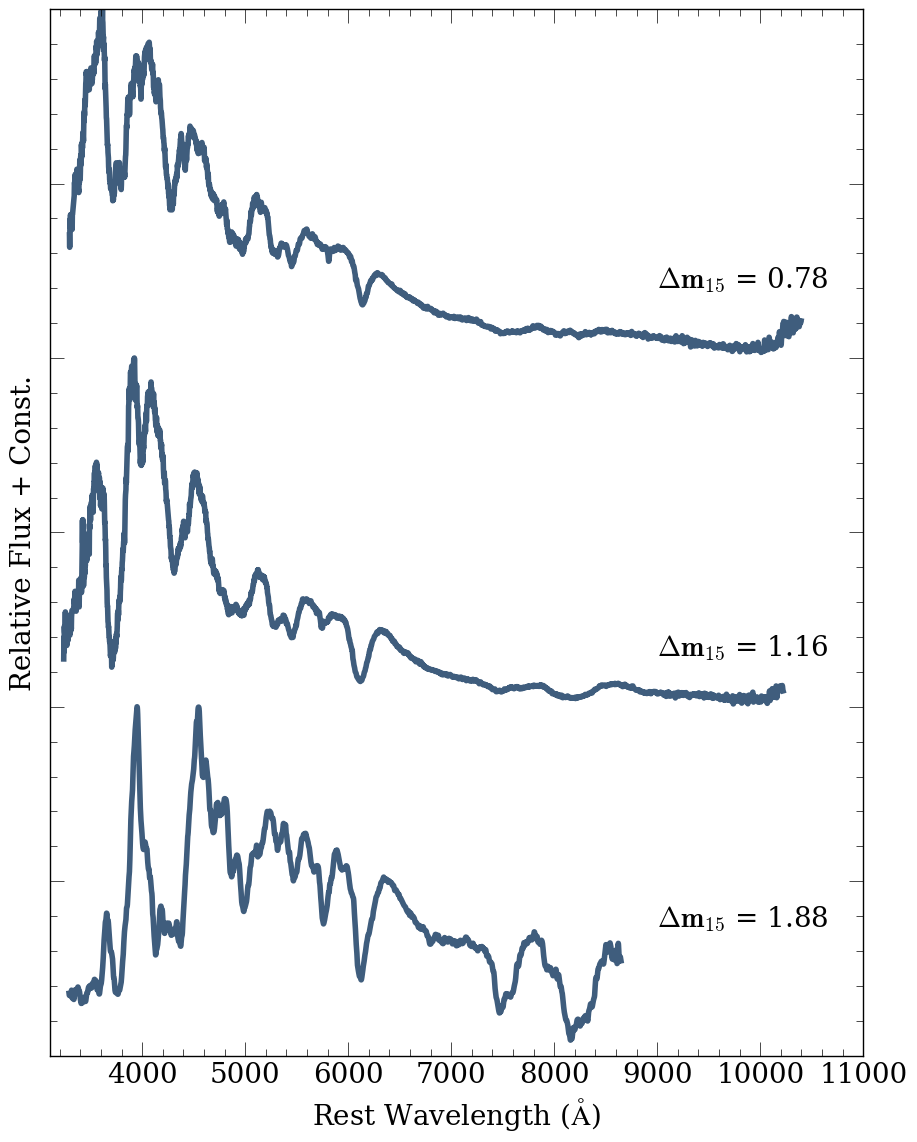

In [102]:
query_db.set_min_num_spec(composites_div, 1)
query_db.stacked_plot(composites_div)